In [1]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import math
from scipy import stats
from sklearn import linear_model
from src.utils.analysis_movies_function import extract_us_nonus, get_all_genre,  get_movies_genre_change, plot_movies_genre_change, plot_percentage_movies_genre_all, linear_regression_plot
from src.utils.analysis_plots_function import count_key_words, plot_key_words_occ, percentage_key_words_before_after, plot_key_words_occ_zoomed


# Loading the data

All the raw data preprocessing, and basic analysis can be found in the jupyter notebook `src/utils/preprocessing.ipynb`. 
In the preprocessing, we did several things: 
- We removed outliers from the dataset (example: a movie with several years of runtime...)
- We transformed data in a more useful way (example: string date to datetime, dict to list...)
- We added new columns from the existing ones and infered some values based on the majority of the data 
- We matched the cleaned ethnicity ID with another dataset to get meaningful ethnicities 

The raw datasets are in `/src/data` and the cleaned and formated datasets are then saved as pkl files in `/data`

In [99]:
movies = pd.read_pickle('data/movies.pkl')
tvtropes = pd.read_pickle('data/tvtropes.pkl')
plot_summaries = pd.read_pickle('data/plot_summaries.pkl')
character_metadata = pd.read_csv('data/preprocessed_character_metadata.tsv', sep='\t')
character_metadata = character_metadata.rename(columns={'Wikipedia_Movie_ID': 'Wikipedia_movie_ID'})

### US selection

In [100]:
us_movies,nonus_movies = extract_us_nonus(movies)
genres_unique = get_all_genre(movies)

# 9/11 US

The genres with the highest change are social issues, horror, political cinema

In [101]:
df = get_movies_genre_change(us_movies, genres_unique, -1 , 1997,  2002,2006)

In [102]:
print(df.count_before.describe())
print("median")
print(df.count_before.median())

count    358.000000
mean       0.279330
std        0.863199
min        0.000000
25%        0.000000
50%        0.031966
75%        0.146510
max        9.738945
Name: count_before, dtype: float64
median
0.031965903036760786


In [103]:
print(df.count_after.describe())
print("median")
print(df.count_after.median())

count    358.000000
mean       0.279330
std        0.814473
min        0.000000
25%        0.000000
50%        0.034737
75%        0.165002
max        8.536691
Name: count_after, dtype: float64
median
0.03473729917498915


We notice here that the distribution of genres is right skewed, with a maximum percentage lower than 10% and a median around 0.03%. We should keep this in mind when we will the percentage and the focus should be more on the change than the absolute value

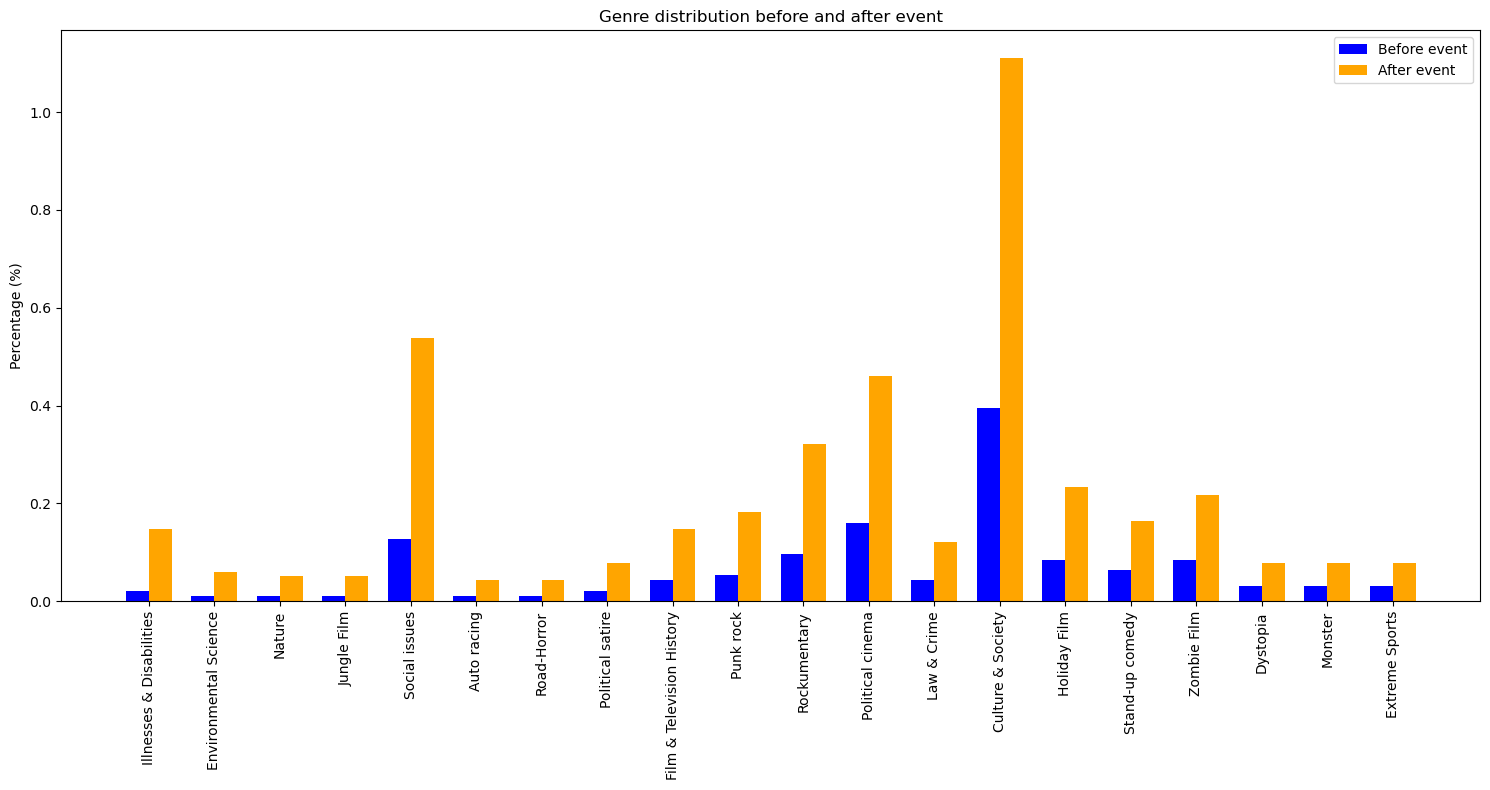

t-statistic: -2.3999224911889345
p-value: 0.021405089343880673


In [104]:
#to get the genre the most impacted, we will choose a small time range to limit cofounding factors
df = get_movies_genre_change(us_movies, genres_unique, 20, 1997,  2002,2006)
plot_movies_genre_change(df)
t_statistic, p_value = stats.ttest_ind(df.count_before, df.count_after)

print("t-statistic:", t_statistic)
print("p-value:", p_value)

for the 20 genres the most changing, there is a significant difference 

In [105]:
# from these 20 genres we focus on the ones linked to politics and social 
genres = ['Social issues', 'Road-Horror','Political satire', 'Film & Television History','Political cinema', 'Law & Crime',
       'Culture & Society','Zombie Film', 'Dystopia', 'Monster']

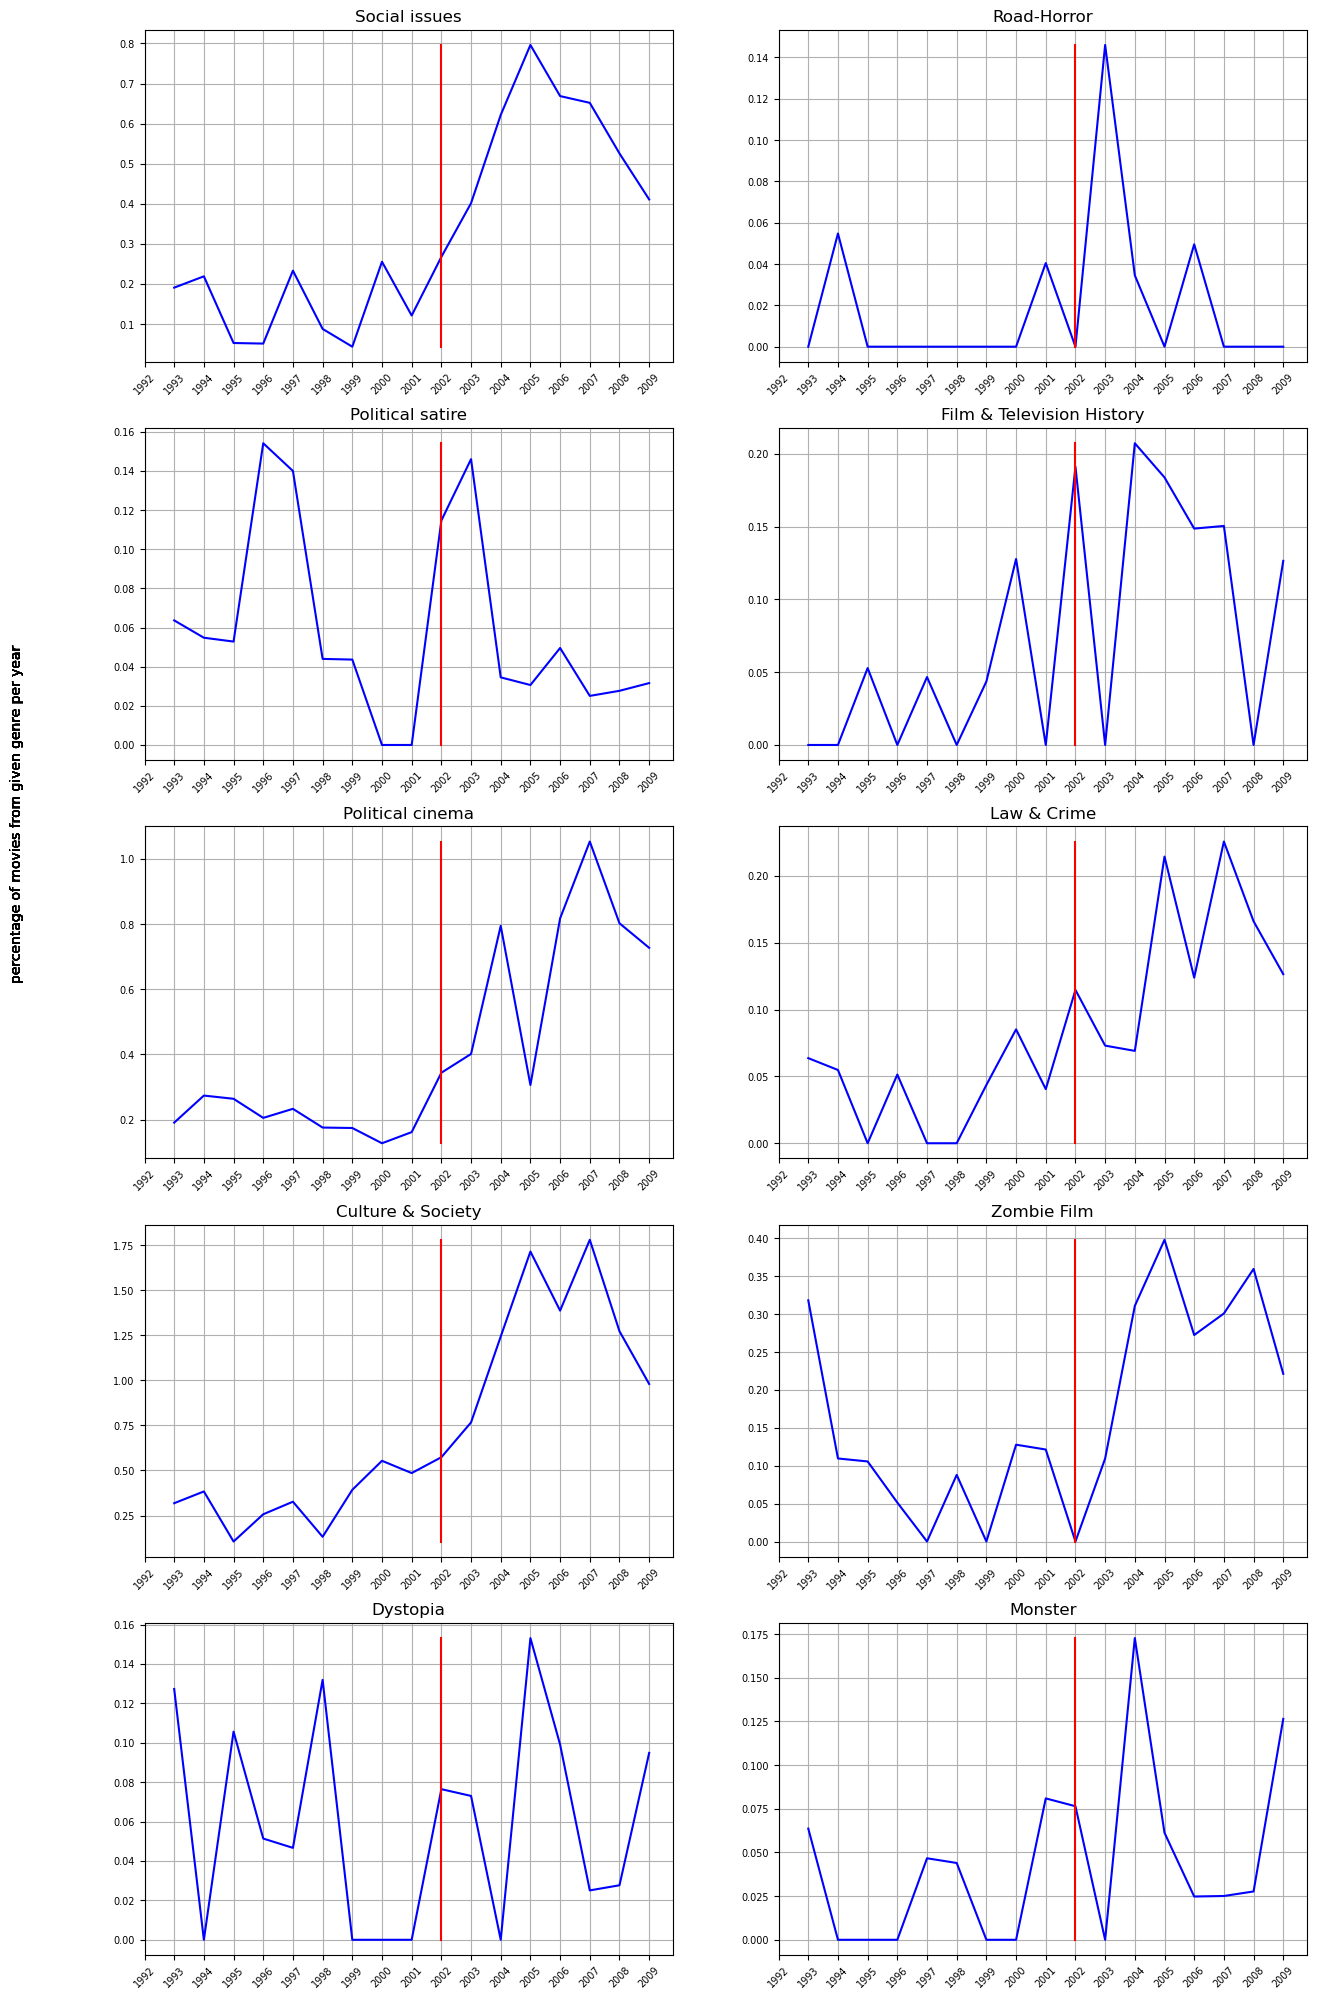

In [106]:
df = get_movies_genre_change(us_movies, genres_unique, 10, 1997,  2002,2006)
#genres =['Social issues','Road-Horror','Political cinema','Political satire', 'Law & Crime','Illnesses & Disabilities','Holiday Film','Social problem film','Glamorized Spy Film','Swashbuckler films','Dystopia', 'Documentary']
plot_percentage_movies_genre_all(us_movies,genres,1992, 2010, 2002,5,2)

We notice an upward trend in the social issues genre after 2002. A similar pattern appears in political cinema, where the trend shifts from a decrease to an increase. Additionally, the road horror genre shows a peak after 2002

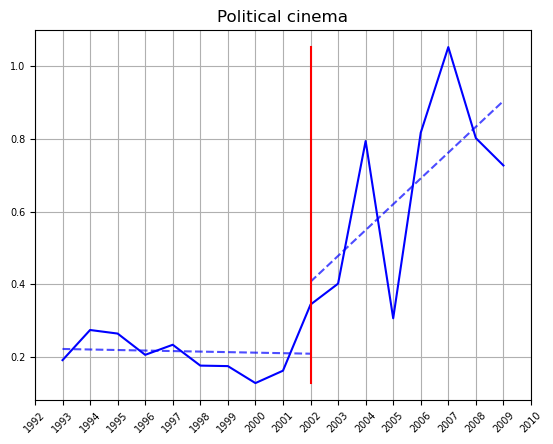

In [107]:
# linear regression for political cinema
linear_regression_plot(us_movies,1992,2010,2002,"Political cinema")



# Non US movies

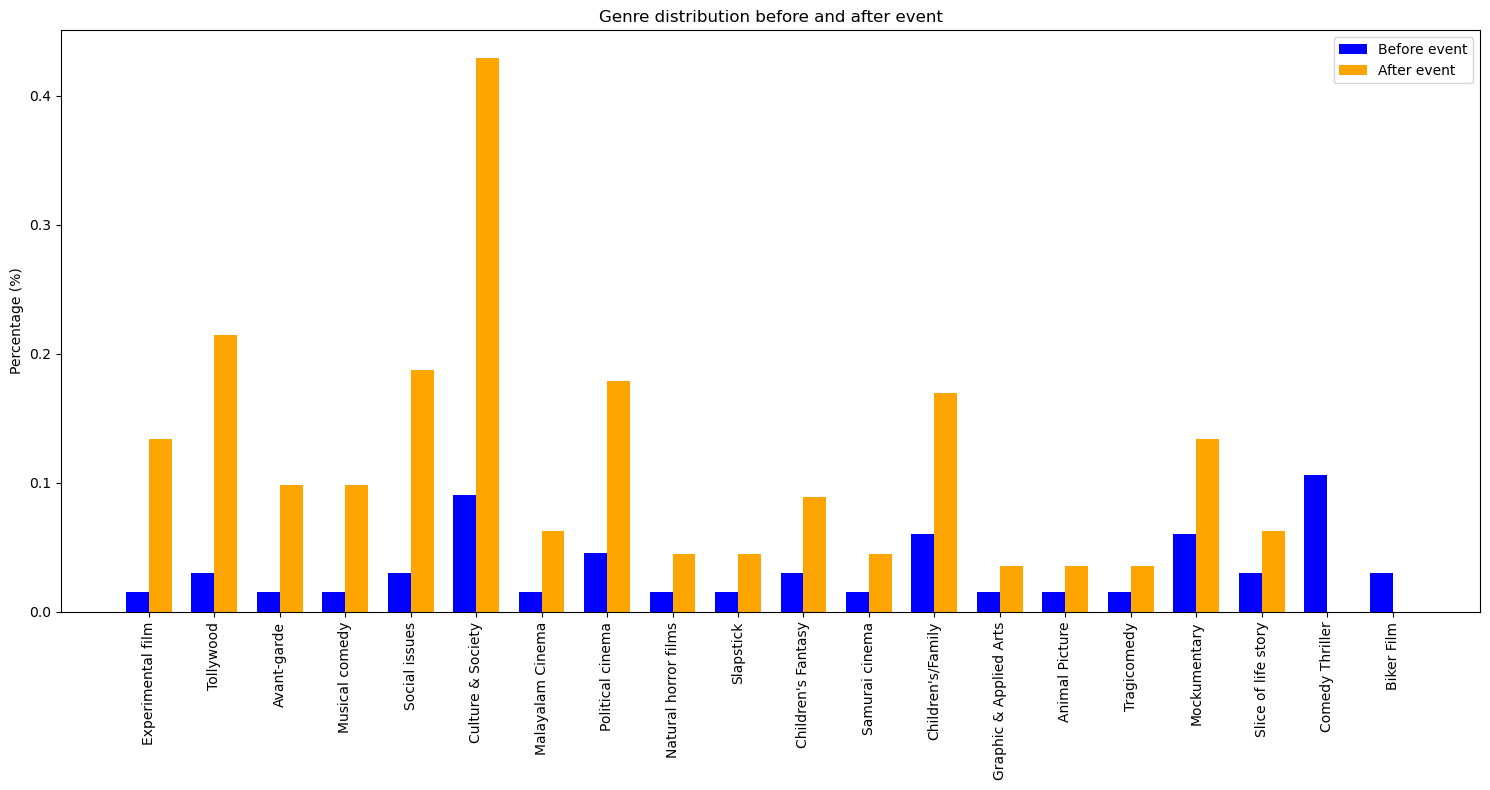

In [108]:
df = get_movies_genre_change(nonus_movies, genres_unique, 20, 1997,  2002,2006)
plot_movies_genre_change(df)

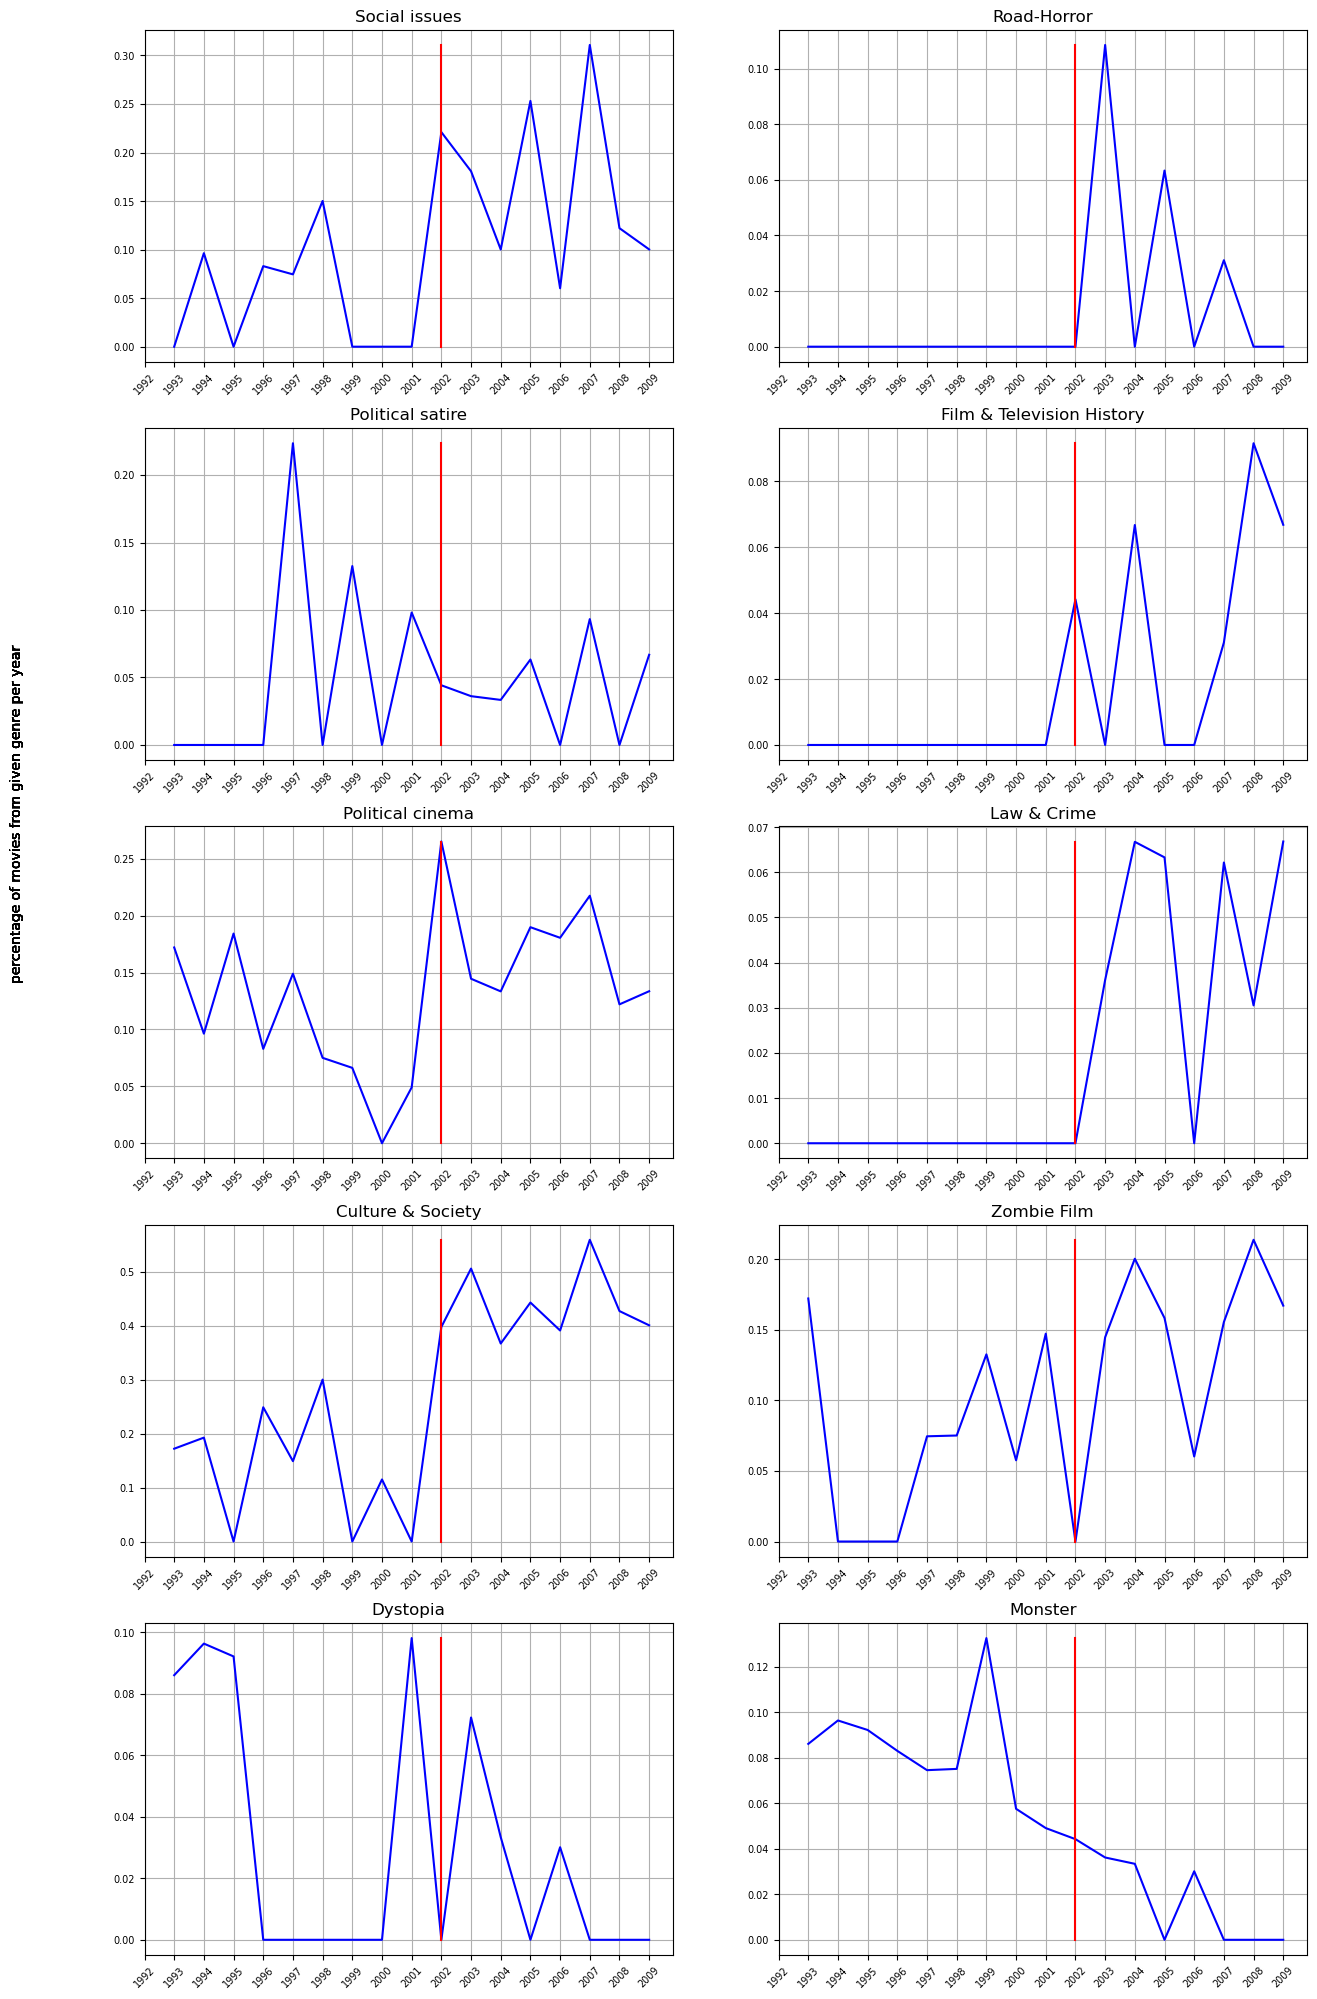

In [109]:
df = get_movies_genre_change(nonus_movies, genres_unique, 10, 1997,  2002,2006)
#genres =['Social issues','Road-Horror','Political cinema','Political satire', 'Law & Crime','Illnesses & Disabilities','Holiday Film','Social problem film','Glamorized Spy Film','Swashbuckler films','Dystopia', 'Documentary']
plot_percentage_movies_genre_all(nonus_movies,genres,1992, 2010, 2002,5,2)

We observe that the 20 genres with the highest changes are not completely identical between the U.S. and the rest of the world. Additionally, examining the time series for each genre studied in the U.S., we see that genres like political cinema, for example, show different trends in variation when compared to their counterparts outside the U.S.

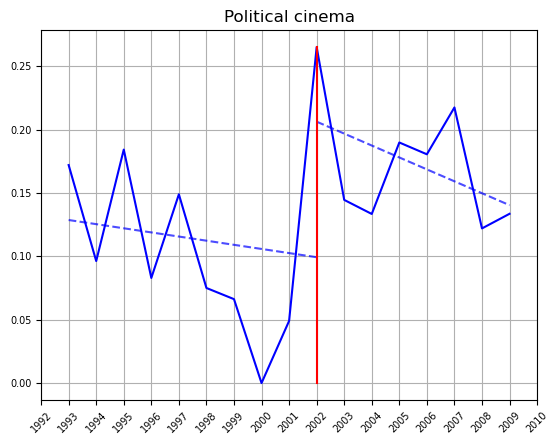

In [110]:
# linear regression for political cinema
linear_regression_plot(nonus_movies,1992,2010,2002,"Political cinema")



The impact is more pronounced for non-U.S. countries, with a sharp peak followed by a decrease. This could be due to the significant impact of the 2001 event, but the long-term effect on non-U.S. countries may be less important

# Plot summaries analysis on 9/11

### We will inspect the plot of movies to detect any change in lexical fields w.r.t 9/11.

We first merge the movies and plot summaries datasets.

In [111]:

movies_and_plot = pd.merge(left=movies, right=plot_summaries, on='Wikipedia_movie_ID')
movies_and_plot.head()

,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Movie_release_date,Movie_box_office_revenue,Movie_runtime,Movie_languages,Movie_countries,Movie_genres,nb_languages,nb_country,nb_genre,Movie_language,FirstLanguage_Name,SecondLanguage_Name,FirstCountry_Name,SecondCountry_Name,Plot
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24 00:00:00+00:00,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}",[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...",1,1,7,[English ],English,None,United States of America,None,"Set in the second half of the 22nd century, th..."
1,9363483,/m/0285_cd,White Of The Eye,1987-01-01 00:00:00+00:00,NaN,110.0,"{""/m/02h40lc"": ""English Language""}",[United Kingdom],"[Thriller, Erotic thriller, Psychological thri...",1,1,3,[English ],English,None,United Kingdom,None,A series of murders of rich young women throug...
2,261236,/m/01mrr1,A Woman in Flames,1983-01-01 00:00:00+00:00,NaN,106.0,"{""/m/04306rv"": ""German Language""}",[Germany],[Drama],1,1,1,[German ],German,None,Germany,None,"Eva, an upper class housewife, becomes frustra..."
3,18998739,/m/04jcqvw,The Sorcerer's Apprentice,2002-01-01 00:00:00+00:00,NaN,86.0,"{""/m/02h40lc"": ""English Language""}",[South Africa],"[Family Film, Fantasy, Adventure, World cinema]",1,1,4,[English ],English,None,South Africa,None,"Every hundred years, the evil Morgana returns..."
4,6631279,/m/0gffwj,Little city,1997-04-04 00:00:00+00:00,NaN,93.0,"{""/m/02h40lc"": ""English Language""}",[United States of America],"[Romantic comedy, Ensemble Film, Comedy-drama,...",1,1,7,[English ],English,None,United States of America,None,"Adam, a San Francisco-based artist who works a..."


Here are the words we are interested in. It can be modified to have more key words.

In [112]:
key_words = ['plane', 'tower', 'twin tower', 'terrorism', 'terrorist', 'hijack', 'islam', 'world trade center']
col_name_of_key_words = ['Count_of_' + '_'.join(word.split(' ')) for word in key_words]

In [113]:
# Count the number of occurences of key words in plot summary for each movie 
df_key_words_occ = count_key_words(movies_and_plots_df=movies_and_plot.copy(), key_words=key_words)
df_key_words_occ

,Count_of_plane,Count_of_tower,Count_of_twin_tower,Count_of_terrorism,Count_of_terrorist,Count_of_hijack,Count_of_islam,Count_of_world_trade_center,Count_movies
Movie_release_date,,,,,,,,,
1894.0,0,0,0,0,0,0,0,0,2
1895.0,0,0,0,0,0,0,0,0,1
1896.0,0,0,0,0,0,0,0,0,3
1898.0,0,0,0,0,0,0,0,0,5
1899.0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
2010.0,72,22,0,5,82,11,0,0,1060
2011.0,46,13,0,1,24,6,0,0,784
2012.0,41,9,0,2,25,8,0,0,530


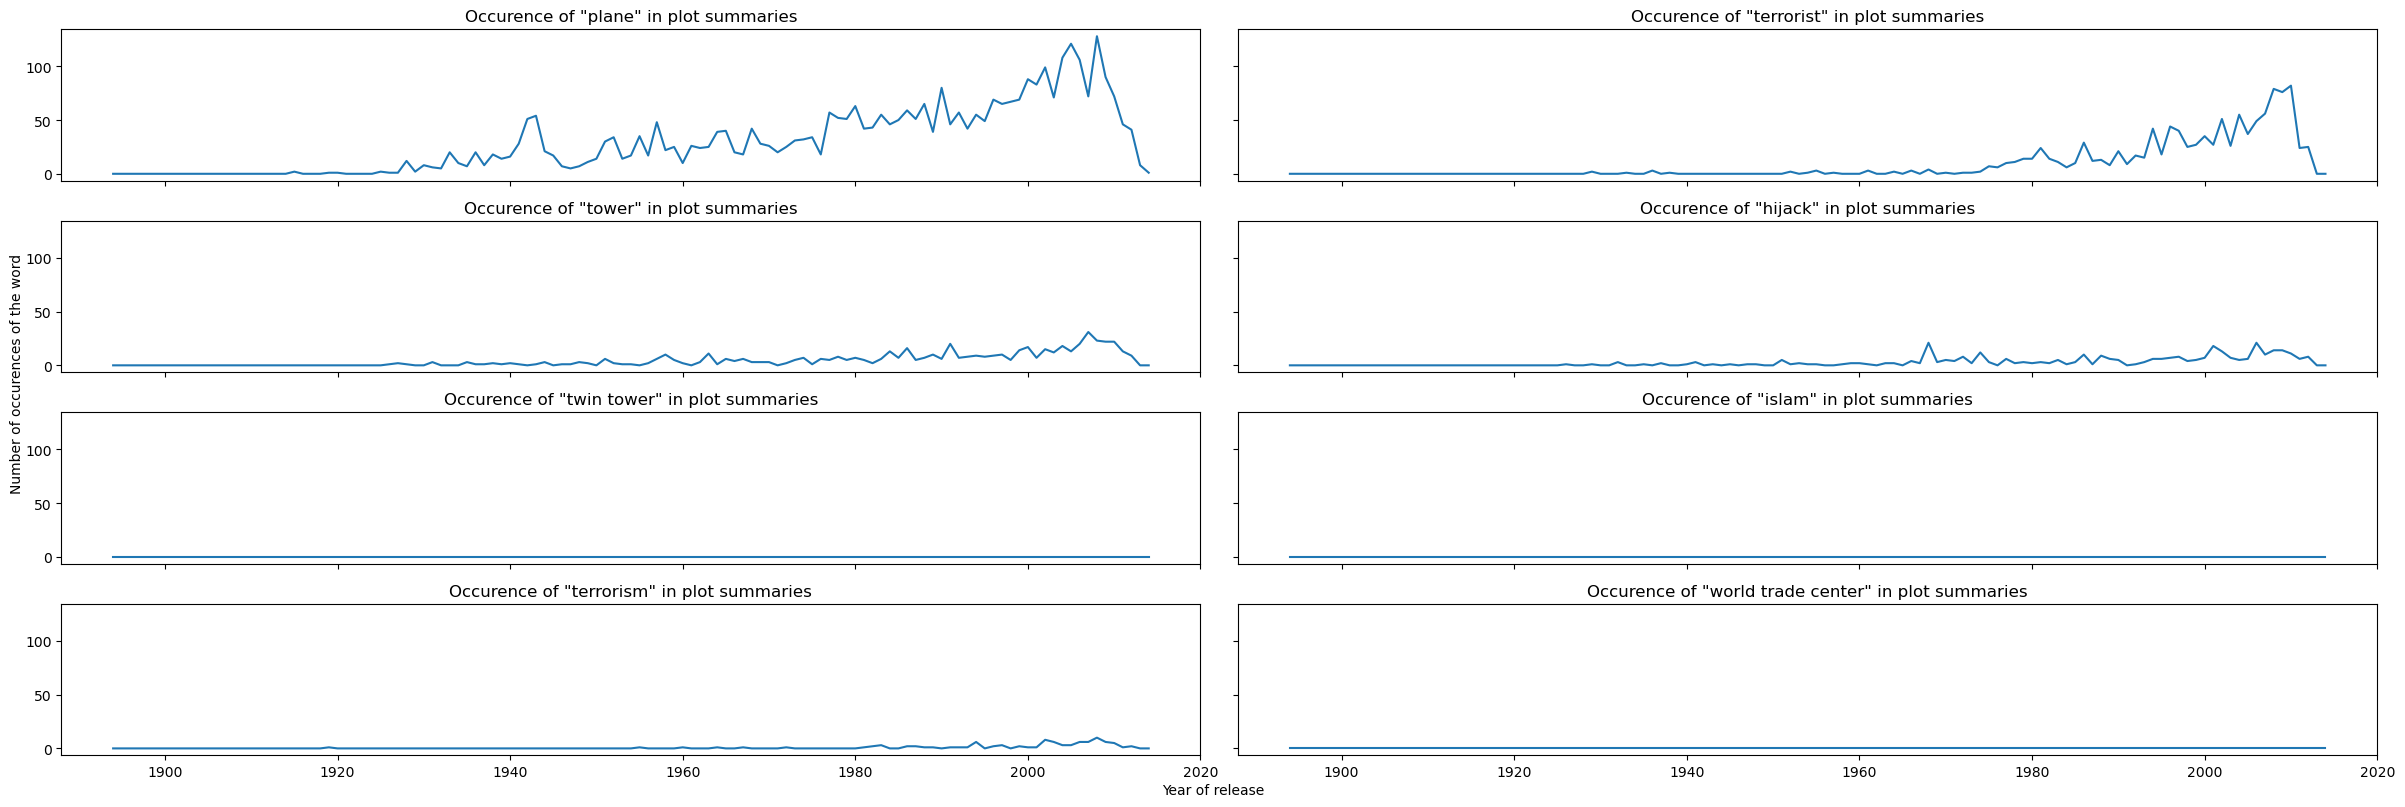

In [114]:
plot_key_words_occ(key_words_occ_df=df_key_words_occ, key_words=key_words)

Now we zoom in our period of interest.

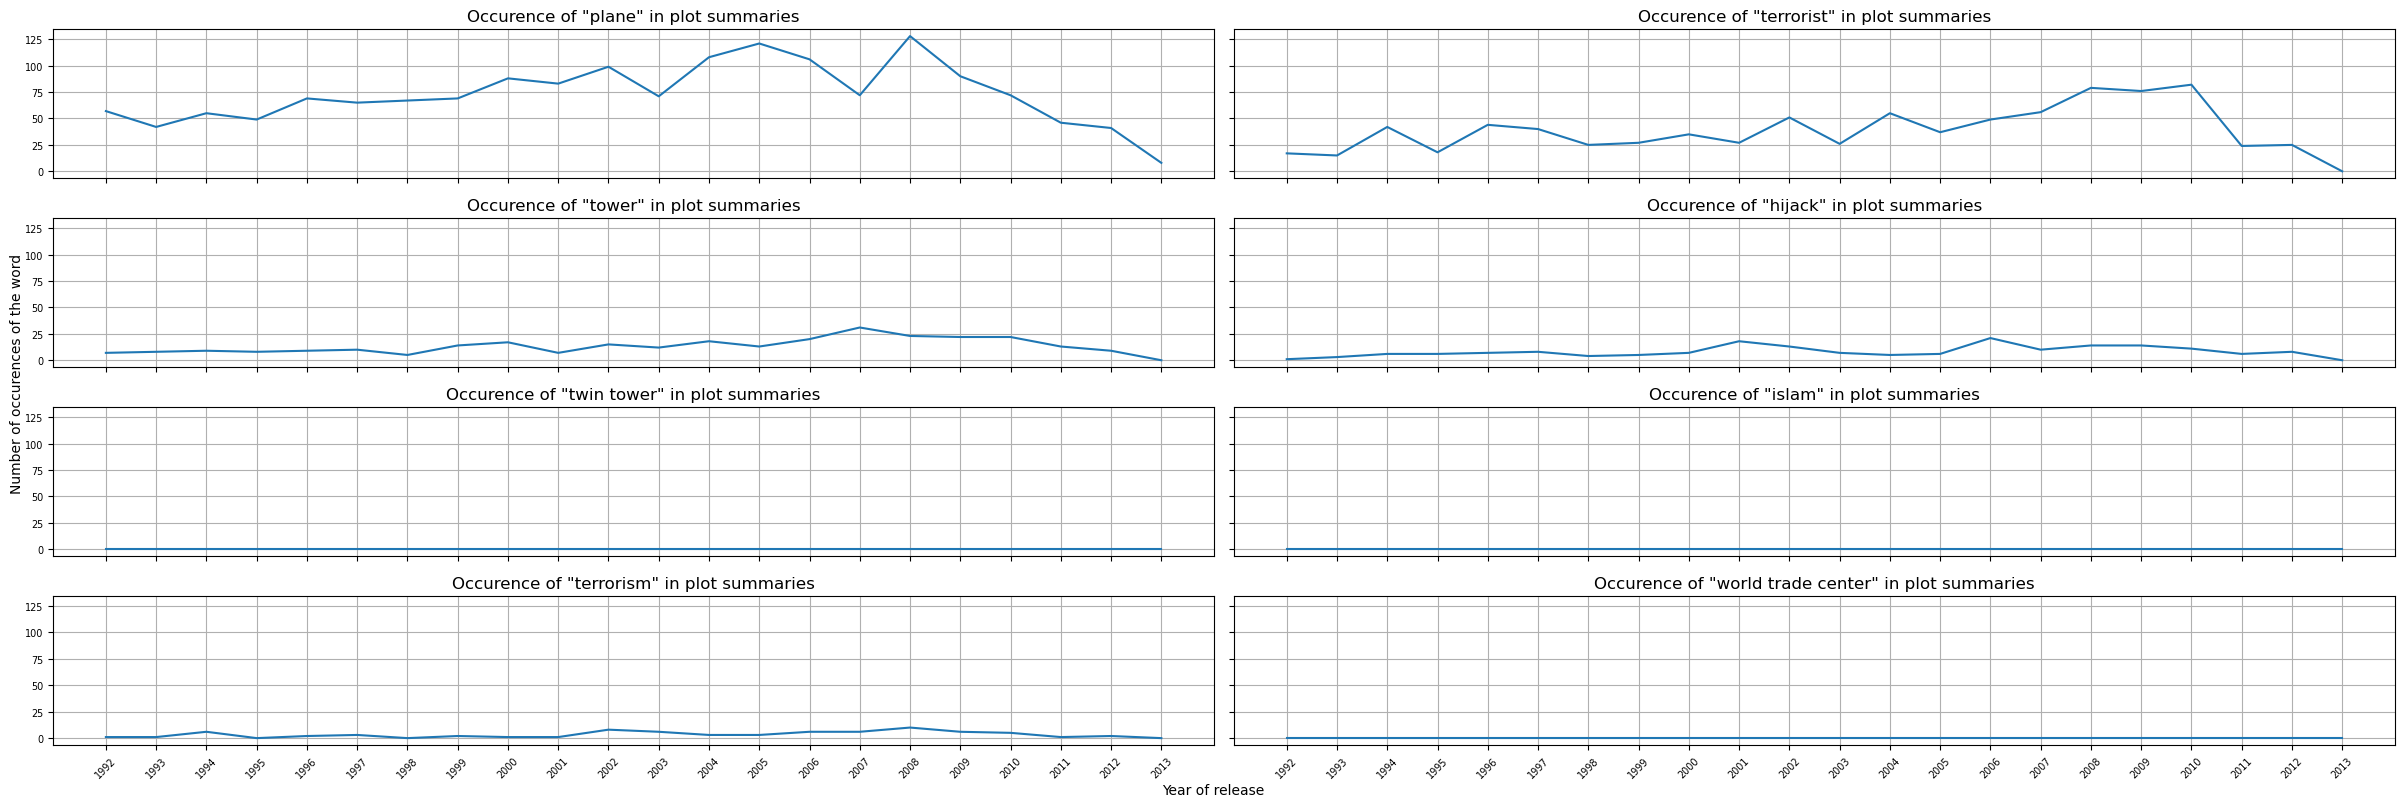

In [115]:
plot_key_words_occ_zoomed(key_words_occ_df=df_key_words_occ, key_words=key_words)

We can see that the word "terrorist" and "tower" were more frequent after 2002, but drops in 2010. We see that the words "terrorism", "islam", "world trade center" and "twin tower" are negligible. There is a peak for the word "hijack" in 2006 and then drops a bit.


Now by percentage !


In [116]:
df_key_words_occ_before_after = percentage_key_words_before_after(df_key_words_occ)
df_key_words_occ_before_after

,1992-2002,2003-2013
Count_of_plane,11.287%,7.962%
Count_of_tower,1.656%,1.688%
Count_of_twin_tower,0.0%,0.0%
Count_of_terrorism,0.38%,0.443%
Count_of_terrorist,5.18%,4.696%
Count_of_hijack,1.185%,0.941%
Count_of_islam,0.0%,0.0%
Count_of_world_trade_center,0.0%,0.0%



It is interesting to see that for the word "plane", it is less used after 9/11 than before, even though you would expect to have more.

# Actor Ethnicity analysis

We want to look at the character ethnicity representation depending on the country. Therefore, we can merge the character dataset with the column from the movie dataset containing the country of each film.

In [117]:
character_countries = pd.merge(character_metadata , movies[['Wikipedia_movie_ID','Movie_countries']], on = 'Wikipedia_movie_ID')
character_countries.sample(5)

,Wikipedia_movie_ID,Freebase_Movie_ID,Character_Name,Actor_Ethnicity,Actor_Name,Actor_Age_At_Movie_Release,Freebase_Character_Actor_Map_ID,Freebase_character_ID,Freebase_Actor_ID,Movie_Release_Year,Ethnicity_Label,Movie_countries
42529,2812082,/m/08489x,NaN,/m/033tf_,Martin Donovan,37.0,/m/04hvc31,NaN,/m/08664q,1994.0,Irish Americans,[United States of America]
34677,8422241,/m/0272wbj,Rama,/m/0bpjh3,Moon Moon Sen,42.0,/m/0h5g8s_,/m/0h5g8t1,/m/08t7tw,1991.0,Bengali,[India]
50492,3146483,/m/08vf4y,Mr. Kim,/m/0d2by,Michael Paul Chan,51.0,/m/0c0ndm4,/m/0c0ndm7,/m/0f587n,2001.0,Chinese Americans,[United States of America]
72158,33590170,/m/0hgql4n,NaN,/m/041rx,Cornel Wilde,39.0,/m/0hgvqtm,NaN,/m/01380_,1952.0,Jewish people,[United States of America]
16534,19855417,/m/04q2gkg,NaN,/m/0dryh9k,Divya Dutta,32.0,/m/0dlsdc8,NaN,/m/05xhmh,2010.0,Indian,"[United States of America, India]"


## Actor ethnicity in the US vs Rest of the world
We want to analyze the impact of 9/11 on the actor ethnicty within each film. In this purpose we will analyze the actor ethnicity changement befrore and after 9/11. Moreover, we expect for 9/11 to have a higher impact in the US compared to the rest of the world. Therefore, we will compare the data on those levels.

In [118]:
movies.columns

Index(['Wikipedia_movie_ID', 'Freebase_movie_ID', 'Movie_name',
       'Movie_release_date', 'Movie_box_office_revenue', 'Movie_runtime',
       'Movie_languages', 'Movie_countries', 'Movie_genres', 'nb_languages',
       'nb_country', 'nb_genre', 'Movie_language', 'FirstLanguage_Name',
       'SecondLanguage_Name', 'FirstCountry_Name', 'SecondCountry_Name'],
      dtype='object')

In [119]:
character_metadata.columns

Index(['Wikipedia_movie_ID', 'Freebase_Movie_ID', 'Character_Name',
       'Actor_Ethnicity', 'Actor_Name', 'Actor_Age_At_Movie_Release',
       'Freebase_Character_Actor_Map_ID', 'Freebase_character_ID',
       'Freebase_Actor_ID', 'Movie_Release_Year', 'Ethnicity_Label'],
      dtype='object')

In [120]:
character.head()

,Wikipedia_movie_ID,Freebase_Movie_ID,Character_Name,Actor_Ethnicity,Actor_Name,Actor_Age_At_Movie_Release,Freebase_Character_Actor_Map_ID,Freebase_character_ID,Freebase_Actor_ID,Movie_Release_Year,Ethnicity_Label,Movie_countries
0,975900,/m/03vyhn,Desolation Williams,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l,2001.0,African Americans,[United States of America]
1,975900,/m/03vyhn,Commander Helena Braddock,/m/0x67,Pam Grier,52.0,/m/02vdcfp,/m/0bgchnd,/m/0418ft,2001.0,African Americans,[United States of America]
2,975900,/m/03vyhn,Tres,/m/064b9n,Rodney A. Grant,42.0,/m/0bgchrs,/m/0bgchrw,/m/03ydsb,2001.0,Omaha people,[United States of America]
3,3196793,/m/08yl5d,NaN,/m/0x67,Albert Hall,62.0,/m/0lr37dy,NaN,/m/01lntp,2000.0,African Americans,[United States of America]
4,2314463,/m/0734w5,NaN,/m/041rx,Seth Green,31.0,/m/04htrcg,NaN,/m/0gz5hs,2006.0,Jewish people,[United States of America]


In [121]:
character = character_countries.copy()
type(character)
character.Movie_countries.apply(lambda x: 'United States of America' in str(x))

0         True
1         True
2         True
3         True
4         True
         ...  
73792    False
73793     True
73794    False
73795    False
73796    False
Name: Movie_countries, Length: 73797, dtype: bool

In [122]:
character = character_countries.copy()
print("length of the dataset: ", len(character))

#Separation into 2 datasets, one with only movies form the US and the other that contaisn all the other movies

character_ROW = character.loc[~character.Movie_countries.apply(lambda x: 'United States of America' in str(x))]
print("length of the ROW dataset: ", len(character_ROW))

character_US = character.loc[character.Movie_countries.apply(lambda x: 'United States of America' in str(x))]
print("length of the US dataset: ", len(character_US))

#reset the index

character_ROW = character_ROW.reset_index(drop = True)
character_US = character_US.reset_index(drop = True)

length of the dataset:  73797
length of the ROW dataset:  30580
length of the US dataset:  43217


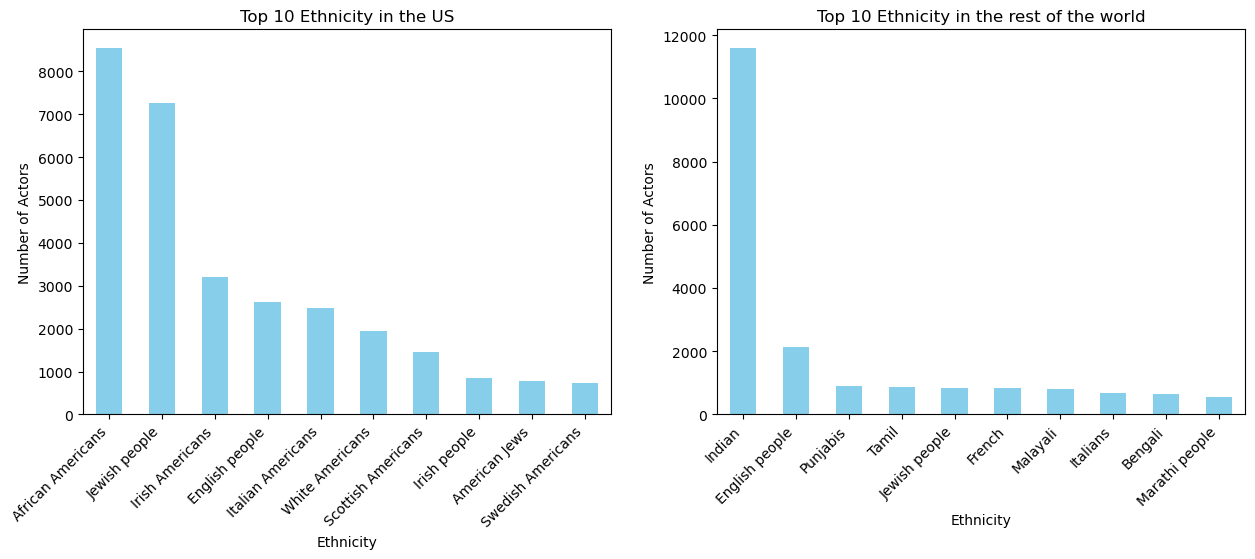

In [123]:
# Count the occurrences of each ethnicity
ethnicity_top10_ROW = character_ROW['Ethnicity_Label'].value_counts().nlargest(10)
ethnicity_top10_US = character_US['Ethnicity_Label'].value_counts().nlargest(10)

# Plot the distribution of each ethnicity
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
ethnicity_top10_US.plot(kind='bar', color='skyblue')
plt.title("Top 10 Ethnicity in the US")
plt.xlabel("Ethnicity")
plt.ylabel("Number of Actors")
plt.xticks(rotation=45, ha='right')

plt.subplot(1,2,2)
ethnicity_top10_ROW.plot(kind='bar', color='skyblue')
plt.title("Top 10 Ethnicity in the rest of the world")
plt.xlabel("Ethnicity")
plt.ylabel("Number of Actors")
plt.xticks(rotation=45, ha='right')
# plt.subplots_adjust(wspace=0.5)
plt.show()


We observe the top 10 ethnicty in the rest of the world differ from the top 10 ethnicty within the US. The African Americains is the most represented ethnicity in the US whereas in the rest of the world this is the indian. 

### The impact of 9/11
We will now deep into a reduce period of time, between 1993 and 2010 and observe the difference between ethnicities representation in the US compared to the rest of the world. 

In [124]:
# First for the US movies, we will filter the data for movies released between 1993 and 2001 and between 2002 and 2010,
# and study the most common ethnicities for these time periods.

#  Filter data for movies released between 1990 and 2001
data_1993_2001_US = character_US[(character_US['Movie_Release_Year'] >= 1993) & 
                                    (character_US['Movie_Release_Year'] <= 2001)]
data_2002_2010_US = character_US[(character_US['Movie_Release_Year'] >= 2002) & 
                                    (character_US['Movie_Release_Year'] <= 2010)]

# Count the top 10 ethnicities overall
top_ethnicities_US = character_US['Ethnicity_Label'].value_counts().nlargest(10).index

# Filter for only these top ethnicities in each subset
data_1993_2001_top_US = data_1993_2001_US[data_1993_2001_US['Ethnicity_Label'].isin(top_ethnicities_US)]
data_2002_2010_top_US = data_2002_2010_US[data_2002_2010_US['Ethnicity_Label'].isin(top_ethnicities_US)]

# Count occurrences for each ethnicity in each time period
ethnicity_counts_1993_2001_US = data_1993_2001_top_US['Ethnicity_Label'].value_counts(normalize=True)
ethnicity_counts_2002_2010_US = data_2002_2010_top_US['Ethnicity_Label'].value_counts(normalize=True)

We apply the same procedure for the rest of the world

In [125]:
#  Filter data for movies released between 1990 and 2001
data_1993_2001_ROW = character_ROW[(character_ROW['Movie_Release_Year'] >= 1993) & 
                                    (character_ROW['Movie_Release_Year'] <= 2001)]
data_2002_2010_ROW = character_ROW[(character_ROW['Movie_Release_Year'] >= 2002) &
                                    (character_ROW['Movie_Release_Year'] <= 2010)]

# Count the top 10 ethnicities overall
top_ethnicities_ROW = character_ROW['Ethnicity_Label'].value_counts().nlargest(10).index

# Filter for only these top ethnicities in each subset
data_1993_2001_top_ROW = data_1993_2001_ROW[data_1993_2001_ROW['Ethnicity_Label'].isin(top_ethnicities_ROW)]
data_2002_2010_top_ROW = data_2002_2010_ROW[data_2002_2010_ROW['Ethnicity_Label'].isin(top_ethnicities_ROW)]

# Count occurrences for each ethnicity in each time period
ethnicity_counts_1993_2001_ROW = data_1993_2001_top_ROW['Ethnicity_Label'].value_counts(normalize=True)
ethnicity_counts_2002_2010_ROW = data_2002_2010_top_ROW['Ethnicity_Label'].value_counts(normalize=True)

We can now plot the proportion of actor among the 10 most represented ethnicities, for the US and the rest of the world, and compare to see whether there is a different distribution in the two time periods.

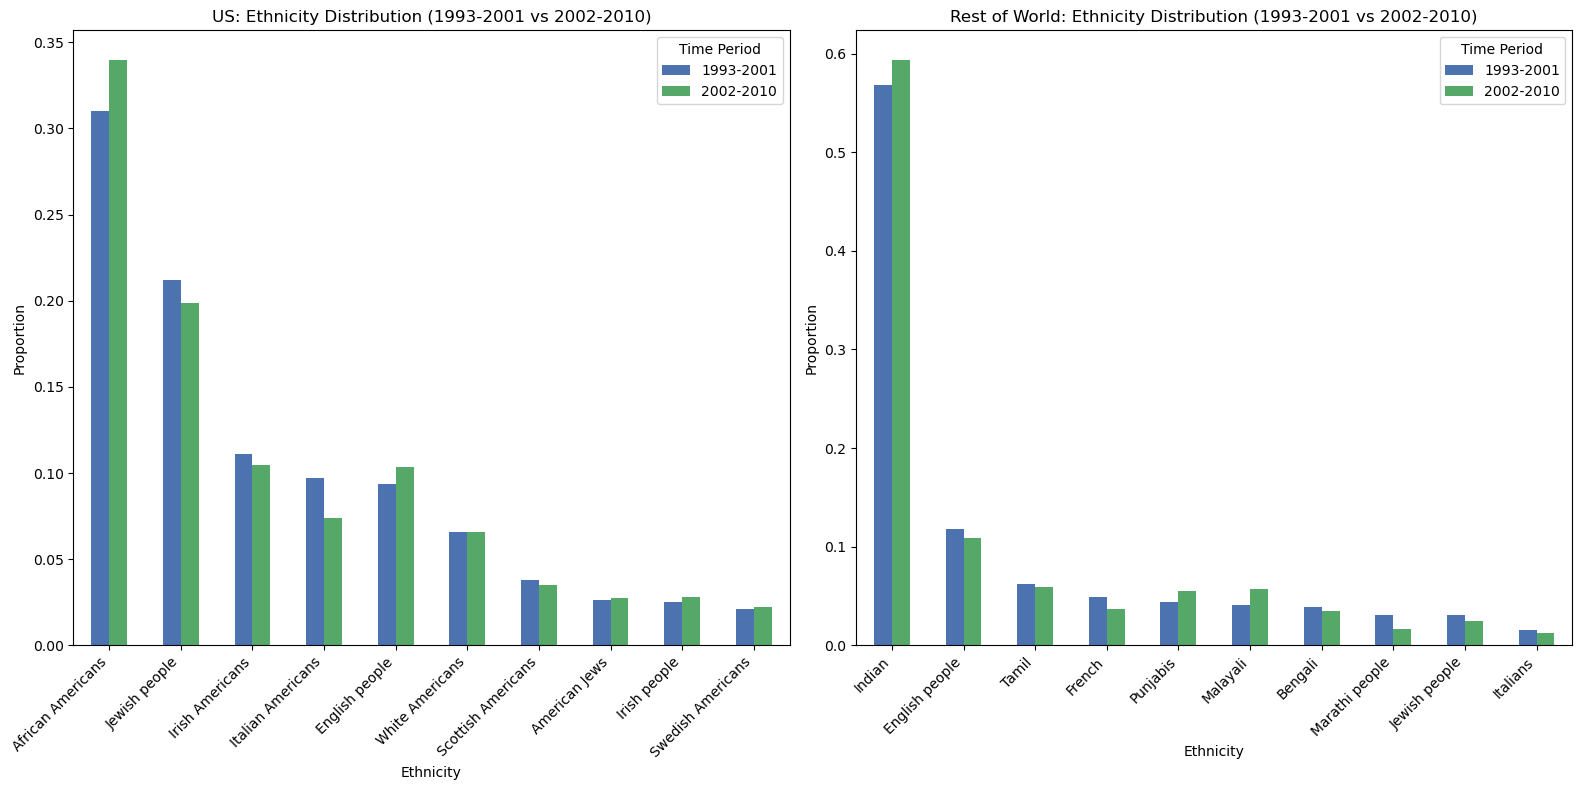

In [126]:

# Convert ethnicity counts to DataFrames for easier plotting
df_US = pd.DataFrame({
    'Ethnicity': ethnicity_counts_1993_2001_US.index,
    '1993-2001': ethnicity_counts_1993_2001_US.values,
    '2002-2010': ethnicity_counts_2002_2010_US.reindex(ethnicity_counts_1993_2001_US.index, fill_value=0).values
})

df_ROW = pd.DataFrame({
    'Ethnicity': ethnicity_counts_1993_2001_ROW.index,
    '1993-2001': ethnicity_counts_1993_2001_ROW.values,
    '2002-2010': ethnicity_counts_2002_2010_ROW.reindex(ethnicity_counts_1993_2001_ROW.index, fill_value=0).values
})

# Set up the plotting style
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Plot for US
df_US.set_index('Ethnicity').plot(
    kind='bar', ax=axes[0], color=['#4c72b0', '#55a868']
)
axes[0].set_title('US: Ethnicity Distribution (1993-2001 vs 2002-2010)')
axes[0].set_ylabel('Proportion')
axes[0].set_xlabel('Ethnicity')
axes[0].legend(title="Time Period")
axes[0].set_xticklabels(df_US['Ethnicity'], rotation=45, ha="right")

# Plot for Rest of World
df_ROW.set_index('Ethnicity').plot(
    kind='bar', ax=axes[1], color=['#4c72b0', '#55a868']
)
axes[1].set_title('Rest of World: Ethnicity Distribution (1993-2001 vs 2002-2010)')
axes[1].set_ylabel('Proportion')
axes[1].set_xlabel('Ethnicity')
axes[1].legend(title="Time Period")
axes[1].set_xticklabels(df_ROW['Ethnicity'], rotation=45, ha="right")

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


We observe there is no major changes in the top 10 actor ethnciites representation in the movies between 1993 and 2010 neither in the rest of the world or the United States.

Finally, we want to isolate the actor ethnicities that exhibit major changes before and after 9/11. Therefore, we will look at the top 10  actor ethnicites that exxhibit larger relative changes ratio. 

In [127]:
# Count the occurrences of each ethnicity in each period for rest of the world and US 
ethnicity_counts_1993_2001_US = data_1993_2001_US['Ethnicity_Label'].value_counts()
ethnicity_counts_2002_2010_US = data_2002_2010_US['Ethnicity_Label'].value_counts()

ethnicity_counts_1993_2001_ROW = data_1993_2001_ROW['Ethnicity_Label'].value_counts()
ethnicity_counts_2002_2010_ROW = data_2002_2010_ROW['Ethnicity_Label'].value_counts()

# We compute the relative changes for each ethnicites between 1991 and 2011
#Use absolute value to avoid the negative value and for subsequnet isolation of smaller and largest relative difference 
ratio_US = np.abs(ethnicity_counts_1993_2001_US - ethnicity_counts_2002_2010_US) / (ethnicity_counts_1993_2001_US)
ratio_ROW = np.abs(ethnicity_counts_1993_2001_ROW - ethnicity_counts_2002_2010_ROW) / (ethnicity_counts_1993_2001_ROW)


# Sort by the ratio to find the largest 
largest_ratios_US = ratio_US.nlargest(10)
largest_ratios_ROW = ratio_ROW.nlargest(10)

print("US: 5 Largest Ratios: \n \n", largest_ratios_US)
print("\n \n Rest of the world: 5 Largest Ratios:\n \n", largest_ratios_ROW)

US: 5 Largest Ratios: 
 
 Ethnicity_Label
Japanese people         25.00
Chinese Canadians       14.00
Ukrainians              13.00
Gujarati people         11.50
Eurasian                11.00
Croatian Canadians       7.00
Dominican Americans      6.75
Norwegians               6.50
Croatian Australians     6.00
Filipino people          6.00
Name: count, dtype: float64

 
 Rest of the world: 5 Largest Ratios:
 
 Ethnicity_Label
Tulu people             27.000000
Chinese Filipino        25.333333
Filipino people         18.000000
Sikh                    13.000000
English Australian      10.000000
Filipino Australians     8.000000
Lao people               8.000000
British Americans        7.000000
Jaat                     6.000000
Ukrainians               6.000000
Name: count, dtype: float64


We observe ratios larger than 1 meaning they exhibit significant differences between the 2 observed periods, i.e before and after 9/11. From this first analysis, we do not observe any tendency of impact of 9/11 on racism. 